<a href="https://colab.research.google.com/github/slmayfield/Artificial_Neural_Network_project/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC670: Foundations of Machine Learning Models

## Assignment 3: Multiple Linear Regression

#### Name: Shelby Mayfield

### CodeGrade
Please note that this assignment will be manually graded.  **You will have one attempt at submitting this assignment.**

Since we are merely using CodeGrade for this assignment as a platform to manually grade assignments, CodeGrade will not  execute your code for this assignment. Rather, it simply renders your Jupyter Notebook in the web browser. Therefore, any code blocks that generate output must be fully executed within the notebook prior to submission. Otherwise, we will not see the output of your code!

### Details
The purpose of this assignment is to hone your matplotlib skills, and expose you to an elementary multiple linear regression problem.

The provided data has been generated from a simple linear model, but some random noise has been added. Your goal is to perform multivariate ordinary least squares linear regression to determine the Best Linear Unbiased Estimators (BLUE) for the model (that is, you must calculate the model parameters for a linear regression model).  There will be some irreducible error due to the noise that was injected into the data, therefore we will never be able to exactly recover the "true model parameters".  However, the optimal model parameters computed via the linear regression analysis are sufficiently accurate that you will be able to infer the true model parameters for yourslef!

Here are the steps you will take:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [ ]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [ ]:
#This step will bring the csv into the cell and call the data and call it, fileName #

#import pandas as pd
#from google.colab import drive
#drive.mount('/content/drive')
#CSV via colab, not codegrade#
#Bringing the data into DB form. I am naming the file form fileName_df to df to make it shorter and easier within the code. It allows myself to keep track of what is being called#
#path="/content/drive/MyDrive/MultipleLinearRegression.csv" #
#CSV via codegrade#
fileName_df=pd.read_csv("MultipleLinearRegression.csv")
fileNamedf=fileName_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Create First Image

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
#For this step, I am assigning names to the data so when the following cells grab the x,y, or z data, it knows where to grab from. #
zline=fileNamedf['z']
xline=fileNamedf['x']
yline=fileNamedf['y']
zdata=15*np.random.random(100)

Text(0.5, 0, 'z')

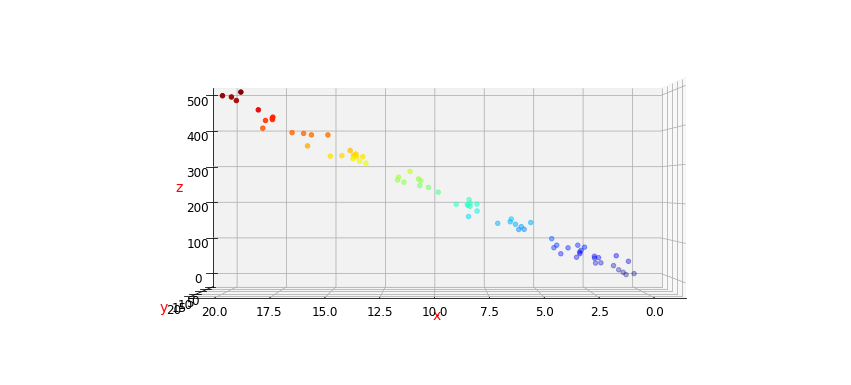

In [ ]:
fig=plt.figure(figsize=[15,15])
#First subplot for LinearDataPlot. The cmap is jet, labels are red, the view is 0 and 90#
ax1=fig.add_subplot(2,1,2,projection='3d')
ax1.scatter3D(xline,yline,zline,c=zline,cmap='jet')
ax1.view_init(0,90)
#This step will be in all of the suplot cell lines. It allows the labels to be assigned and colored red#

ax1.set_xlabel('x',c='r')
ax1.set_ylabel('y',c='r')
ax1.set_zlabel('z',c='r')


Text(0.5, 0, 'z')

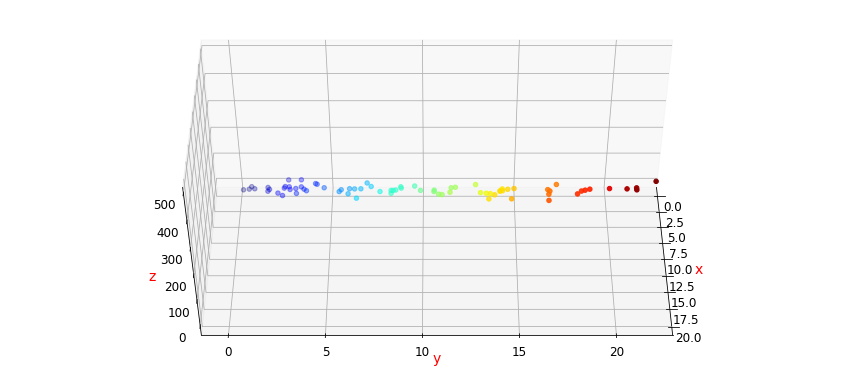

In [ ]:
fig=plt.figure(figsize=[15,15])
#Second subplot for LinearDataPlot. The cmap is jet, labels are red, the view is 45 and 0#
ax2=fig.add_subplot(2,1,2,projection='3d')
ax2.scatter3D(xline,yline,zline,c=zline,cmap='jet')
ax2.view_init(45,0)
#This step will be in all of the suplot cell lines. It allows the labels to be assigned and colored red#

ax2.set_xlabel('x',c='r')
ax2.set_ylabel('y',c='r')
ax2.set_zlabel('z',c='r')


Text(0.5, 0, 'z')

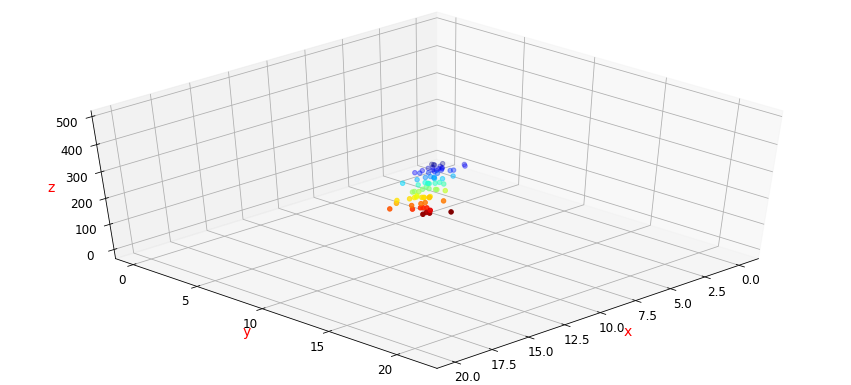

In [ ]:
fig=plt.figure(figsize=[15,15])
#Third subplot for LinearDataPlot. The cmap is jet, labels are red, the view is 45 and 45#
ax3=fig.add_subplot(2,1,2,projection='3d')
ax3.scatter3D(xline,yline,zline,c=zline,cmap='jet')
ax3.view_init(45,45)
#This step will be in all of the suplot cell lines. It allows the labels to be assigned and colored red#

ax3.set_xlabel('x',c='r')
ax3.set_ylabel('y',c='r')
ax3.set_zlabel('z',c='r')

Text(0.5, 0, 'z')

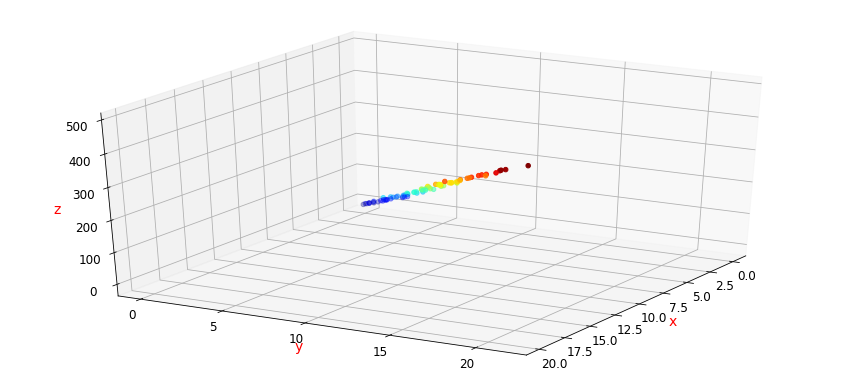

In [ ]:
fig=plt.figure(figsize=[15,15])
#Fourth subplot for LinearDataPlot. The cmap is jet, labels are red, the view is 45 and 45#
ax4=fig.add_subplot(2,1,2,projection='3d')
ax4.scatter3D(xline,yline,zline,c=zline,cmap='jet')
ax4.view_init(30,30)
#This step will be in all of the suplot cell lines. It allows the labels to be assigned and colored red#

ax4.set_xlabel('x',c='r')
ax4.set_ylabel('y',c='r')
ax4.set_zlabel('z',c='r')

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. The `x` and `y` coordinates will be your features and `z` will be your response.

Print the optimal model parameters to the screen by completing the following `print()` statements.

**Note:** Since we are not concerned with generalization error in this assignment, we will not split our data into training and test sets. In 'real-world' projects, you would want to split your data to see how your model performs with data that it has never seen before.

In [ ]:
#First, I am giving the x and y coordinates to the features variable. Second, I am giving the z coordinate to the response variable.
features=fileNamedf[['x','y']]
response=fileNamedf['z']
#sklearn.linear_model#
from sklearn.linear_model import LinearRegression
#This runs the model#
model=LinearRegression()
model.fit(features,response)
model

NameError: ignored

In [ ]:
#Here is the code that will run the coefficient and intercept model for the features and response#
print("Model Coefficients: ",model.coef_)
print("Model Intercept : ",model.intercept_)

Model Coefficients:  [ 8.02602396 15.95639323]
Model Intercept :  -8.632876775060708


# Create Second Image

Now that we have fit our model, which means that we have computed the optimal model parameters, we can use our model to plot the regression line for the data.  Below, I supply you with `x_fit` and `y_fit` that represent the x- and y-data of the regression line, respectively.  All we need to do next is ask the model to predict a `z_fit` value for each `x_fit` and `y_fit` pair by invoking the model's `predict()` method.  This should make sense when you consider the ordinary least squares linear regression equation for calculating `z_fit`:

$$ z_{fit} = \hat{\theta}_0 + \hat{\theta}_1 x_{fit} + \hat{\theta}_2 y_{fit} $$

where $ \hat{\theta}_i $ are the computed model parameters.  You must use `x_fit` and `y_fit` as features to be passed together as a DataFrame to the model's `predict()` method, which will return `z_fit` as determined by the above equation.  Once you obtain `z_fit`, you are ready to plot the regression line by plotting it against `x_fit` and `y_fit`.

In [ ]:
# Plot Curve Fit and make z_fit predictions
x_fit = np.linspace(0,21,1000)
y_fit = x_fit
z_fit=model.predict(features)
z_fit

array([211.3093994 , 324.77982699,   0.80903593, 141.91506492,
        83.57125459,  46.40725589,  60.09784277, 143.57984018,
       179.01765684, 264.44481769, 193.71358774, 323.67338937,
        75.38307221, 416.99263051,   3.38408788, 323.00170661,
       162.59098109, 284.03347215,  63.89022996,  83.00480844,
       350.76279197, 472.46981663, 157.82245968, 324.56881658,
       423.17587412, 416.46338164,  31.33620657,  10.30917532,
        76.0530086 , 419.82611751,  32.16813924, 196.23988104,
       463.7018452 , 260.06410013, 326.59007081, 149.43374714,
       329.93158329, 385.14851201,  36.7887639 , 378.11492449,
       475.65840072, 324.51198563, 126.8405627 , 377.3222139 ,
        51.80682666, 196.69711209, 443.11470594, 127.2813697 ,
       135.23554824,  79.38512702,  -3.14399925, 311.53107222,
       100.65444346, 146.4854717 , 228.24988428,  24.51360534,
       256.36436139,  49.31350423, 261.61785603, 336.9389185 ,
        47.27401111, 191.14931833, 317.2040724 , 199.66

Recreate the first image, but plot the line of best fit in each of the subplots as well.

In [ ]:
#This step creates a third argument that will allow the best fit line to be shown on the four subplots. Here, z_test has been created and displayed. I selected 1000 with the reshape so it matches the x_fit=np.linspace(0,21,1000) values. This step must be added into the four subplots code. #
x_fit=np.linspace(0,21,1000)
y_fit=x_test
xy_test['y_test']=y_test
xy_test['x_test']=x_test
xy_test=xy_test[['x_test','y_test']]
z_test=model.predict(xy_test)
z=test=z_test.reshape(1000,)
z_test


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- x_test
- y_test
Feature names seen at fit time, yet now missing:
- x
- y

  warnings.warn(message, FutureWarning)


array([-8.63287678e+00, -8.12874188e+00, -7.62460698e+00, -7.12047209e+00,
       -6.61633719e+00, -6.11220230e+00, -5.60806740e+00, -5.10393250e+00,
       -4.59979761e+00, -4.09566271e+00, -3.59152782e+00, -3.08739292e+00,
       -2.58325802e+00, -2.07912313e+00, -1.57498823e+00, -1.07085334e+00,
       -5.66718440e-01, -6.25835444e-02,  4.41551352e-01,  9.45686247e-01,
        1.44982114e+00,  1.95395604e+00,  2.45809094e+00,  2.96222583e+00,
        3.46636073e+00,  3.97049562e+00,  4.47463052e+00,  4.97876541e+00,
        5.48290031e+00,  5.98703521e+00,  6.49117010e+00,  6.99530500e+00,
        7.49943989e+00,  8.00357479e+00,  8.50770969e+00,  9.01184458e+00,
        9.51597948e+00,  1.00201144e+01,  1.05242493e+01,  1.10283842e+01,
        1.15325191e+01,  1.20366540e+01,  1.25407889e+01,  1.30449237e+01,
        1.35490586e+01,  1.40531935e+01,  1.45573284e+01,  1.50614633e+01,
        1.55655982e+01,  1.60697331e+01,  1.65738680e+01,  1.70780029e+01,
        1.75821378e+01,  

Text(0.5, 0, 'z')

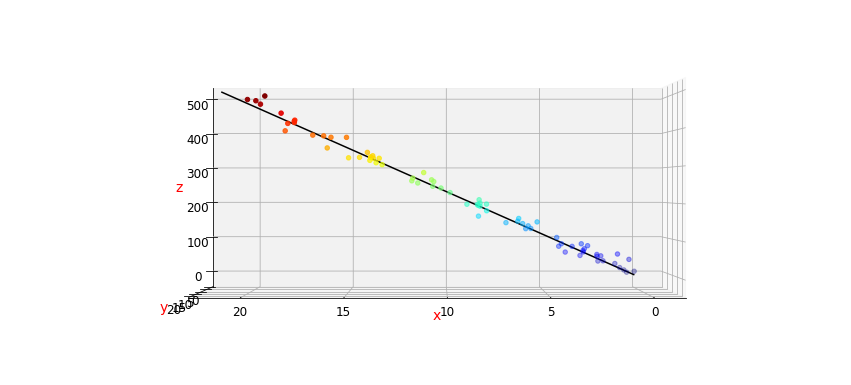

In [ ]:
fig=plt.figure(figsize=[15,15])
#First subplot for LinearDataPlot, with best fit line. The cmap is jet, labels are red, the view is 0 and 90#
ax1=fig.add_subplot(2,1,2,projection='3d')
ax1.plot3D(x_test,y_test,z_test,'black');
ax1.scatter3D(xline,yline,zline,c=zline,cmap='jet')
ax1.view_init(0,90)

ax1.set_xlabel('x',c='r')
ax1.set_ylabel('y',c='r')
ax1.set_zlabel('z',c='r')





Text(0.5, 0, 'z')

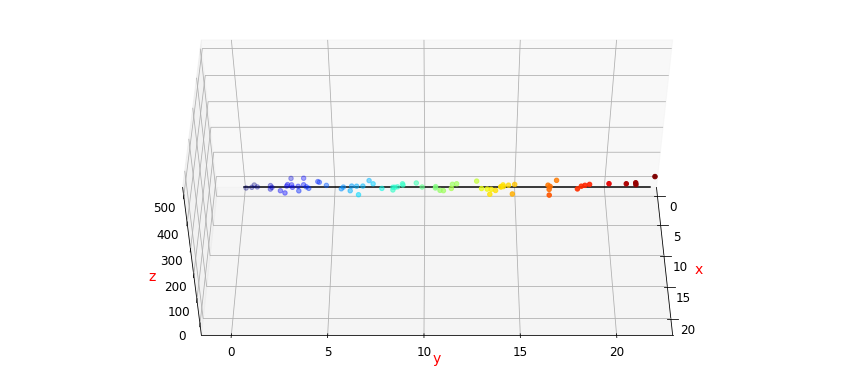

In [ ]:
fig=plt.figure(figsize=[15,15])
#Second subplot for LinearDataPlot. The cmap is jet, labels are red, the view is 45 and 0#
ax2=fig.add_subplot(2,1,2,projection='3d')
ax2.plot3D(x_test,y_test,z_test,'black');
ax2.scatter3D(xline,yline,zline,c=zline,cmap='jet')
ax2.view_init(45,0)
#This step will be in all of the suplot cell lines. It allows the labels to be assigned and colored red#

ax2.set_xlabel('x',c='r')
ax2.set_ylabel('y',c='r')
ax2.set_zlabel('z',c='r')

Text(0.5, 0, 'z')

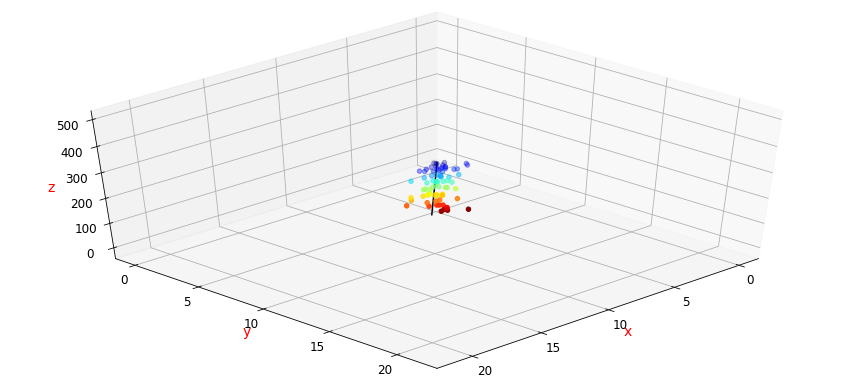

In [ ]:
fig=plt.figure(figsize=[15,15])
#Third subplot for LinearDataPlot. The cmap is jet, labels are red, the view is 45 and 45#
ax3=fig.add_subplot(2,1,2,projection='3d')
ax3.plot3D(x_test,y_test,z_test,'black');
ax3.scatter3D(xline,yline,zline,c=zline,cmap='jet')
ax3.view_init(45,45)
#This step will be in all of the suplot cell lines. It allows the labels to be assigned and colored red#

ax3.set_xlabel('x',c='r')
ax3.set_ylabel('y',c='r')
ax3.set_zlabel('z',c='r')

Text(0.5, 0, 'z')

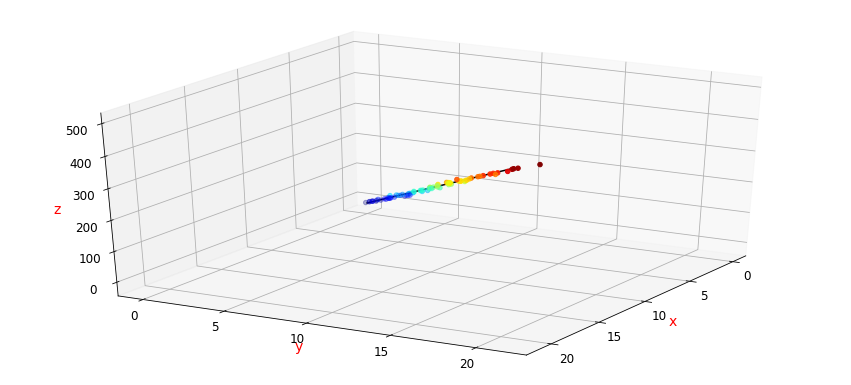

In [ ]:
fig=plt.figure(figsize=[15,15])
#Fourth subplot for LinearDataPlot. The cmap is jet, labels are red, thev view is 45 and 45#
ax4=fig.add_subplot(2,1,2,projection='3d')
ax4.plot3D(x_test,y_test,z_test,'black');
ax4.scatter3D(xline,yline,zline,c=zline,cmap='jet')
ax4.view_init(30,30)
#This step will be in all of the suplot cell lines. It allows the labels to be assigned and colored red#

ax4.set_xlabel('x',c='r')
ax4.set_ylabel('y',c='r')
ax4.set_zlabel('z',c='r')

# Infer the True Model Parameters

I defined the equation of a line plus a random Gaussian noise term in order to generate this data - this is the "true" model (minus the noise term). You took that noisy data and performed a regression analysis to obtain estimates of the "true" model parameters. The noise in the data prevents you from computing those "true" model parameters exactly - there is some irreducible error. Instead, the linear regression model only gives you the Best Linear Unbiased Estimators (BLUE) for the "true" model parameters.

The true model parameters that I selected are <b>integer values</b>. Given this information, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value. You may "hard-code" these values into the below print statements.

In [ ]:
#For this portion of the problem, I will be rounding the integer values. #

In [ ]:
features=fileNamedf[['x','y']]
response=fileNamedf['z']
#sklearn.linear_model#
import math
from sklearn.linear_model import LinearRegression
#This runs the true model#
tmodel=LinearRegression()
tmodel.fit(features,response)
tmodel

LinearRegression()

In [ ]:
tmodel.coef_
tx=tmodel.coef_
tx
#Rounding the values#
xt=np.rint(x)
xt
truex=list(xt)
truex
a=truex
ab=(list(map(int,a)))
ab
model.intercept_
ty=model.intercept_
ty
z=round(ty,0)
z
math.trunc(z)


[8.0, 16.0]

In [ ]:
#This will run the true model coefficients #

print("True Model Coefficients: ",ab)

print("True Model Intercept : ",z)

True Model Coefficients:  [8, 16]
True Model Intercept :  -9.0
